In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

mpl.rc('font',**{'family':'serif','serif':['Times']})

# Import data & deal with dates
data = pd.read_csv('GSPC.csv', index_col='Date')
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


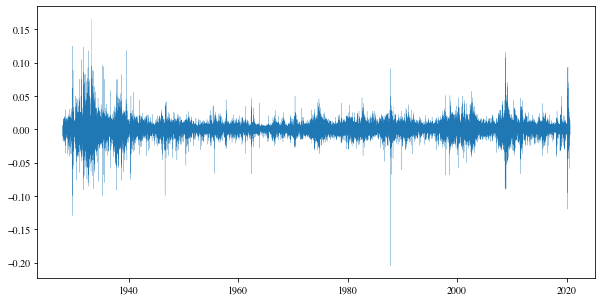

In [2]:
# Generate Returns
returns = data['Adj Close'].pct_change()
plt.figure(figsize=[10,5])
plt.plot(returns.index, returns, linewidth=0.2)

In [3]:
# Include or exculde great crash period
post_1929 = False
if post_1929:
    returns = data['Adj Close'].pct_change()
    returns = returns['1940':]
else:
    returns = data['Adj Close'].pct_change()

In [6]:
# Find worst returning period for given length

# INPUT
period_years = 5



period_length = 253*period_years
minimum = 900000000
maximum = -1
accumulations = []
for i in range(len(returns)-period_length):
    temp_returns = returns[i:period_length+i]
    # Create wealth index
    wealth_index = 1000*(1+temp_returns).cumprod()
    # Update min and max if necessary
    if wealth_index[-1] < minimum:
        minimum = wealth_index[-1]
        min_idx = i
    elif wealth_index[-1] > maximum:
        maximum = wealth_index[-1]
        max_idx = i
    accumulations.append(wealth_index[-1])

Final Value :  278.37
Percentage Change :  -72.0 %
Annualised :  -22.48 %
Period :  1929-09-05 00:00:00  -  1934-10-03 00:00:00


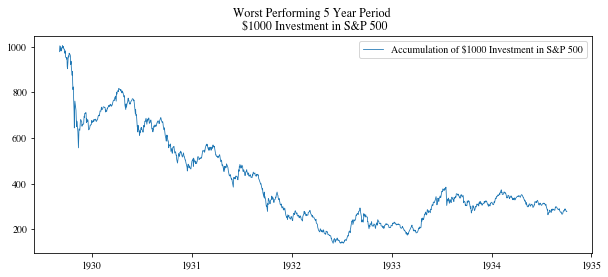

In [7]:
# Plot Biggest Losing Period
temp_returns = returns[min_idx:period_length+min_idx]
wealth_index = 1000*(1+temp_returns).cumprod()
fig = plt.figure(figsize=[10,4])
ax = plt.subplot(111)
title_string = 'Worst Performing ' + str(period_years) + ' Year Period \n \$1000 Investment in S&P 500'
if post_1929:
    title_string = 'Worst Performing ' + str(period_years) + ' Year Period Post-1929 Crash \n \$1000 Investment in S&P 500'

ax.plot(wealth_index, label = 'Accumulation of \$1000 Investment in S&P 500', linewidth = 0.8)
ax.set_title(title_string, color='black')
ax.legend()

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')

#fig.savefig('new_image.png', dpi=600)


total_return = round((wealth_index[-1]-1000)/1000,2)
print("Final Value : ", round(wealth_index[-1],2))
print("Percentage Change : ", total_return*100, "%")
print("Annualised : ", round(((1+total_return)**(1/period_years)-1)*100,2), "%")
print("Period : ", wealth_index.index[0], " - ", wealth_index.index[-1])